In [ ]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import cv2
import datetime

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')
print(type(training_set))

FileNotFoundError: ignored

In [ ]:
history=model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


83/83 [==============================] - 48s 575ms/step - loss: 0.0818 - accuracy: 0.9688 - val_loss: 0.1995 - val_accuracy: 0.9124
Epoch 2/10
83/83 [==============================] - 49s 584ms/step - loss: 0.0812 - accuracy: 0.9734 - val_loss: 0.1184 - val_accuracy: 0.9794
Epoch 3/10
83/83 [==============================] - 49s 584ms/step - loss: 0.0607 - accuracy: 0.9764 - val_loss: 0.0921 - val_accuracy: 0.9845
Epoch 4/10
83/83 [==============================] - 50s 600ms/step - loss: 0.0328 - accuracy: 0.9871 - val_loss: 0.1113 - val_accuracy: 0.9742
Epoch 5/10
83/83 [==============================] - 50s 601ms/step - loss: 0.0409 - accuracy: 0.9840 - val_loss: 0.0900 - val_accuracy: 0.9691
Epoch 6/10
83/83 [==============================] - 52s 619ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.1142 - val_accuracy: 0.9536
Epoch 7/10
83/83 [==============================] - 51s 610ms/step - loss: 0.0443 - accuracy: 0.9878 - val_loss: 0.1539 - val_accuracy: 0.9536
Epoch 8/10

In [ ]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import Sequence


class MySequence(Sequence):
  def __init__(self, *args, **kwargs):
        pass
  def __len__(self):
          return self.length

  def __getitem__(self, index):
        # return index-th complete batch
        pass

data_gen = MySequence(training_set, batch_size=10)

n_batches = len(data_gen)

confusion_matrix(
    np.concatenate([np.argmax(data_gen[i][1], axis=1) for i in range(n_batches)]),
    np.argmax(model.predict_generator(data_gen, steps=n_batches), axis=1)
)


AttributeError: ignored

In [ ]:
Y_pred = model.predict_generator(test_set, 10000 // 32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(training_set.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Confusion Matrix


ValueError: ignored

NameError: ignored

In [ ]:
Y_pred=model.predict_generator(test_datagen)
y_pred=np.argmax(Y_pred,axis=1)
cm=confusion_matrix(test_datagen.classes,y_pred)
plot_confusion_matrix(cm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
model.save('/content/drive/MyDrive/mymodel.h5',model_saved)

In [ ]:
mymodel=load_model('/content/drive/MyDrive/mymodel.h5')
test_image=image.load_img(r'/content/drive/MyDrive/test/without_mask/117.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
Y_pred=mymodel.predict(test_image)[0][0]
print(Y_pred)
test_image1=image.load_img(r'/content/drive/MyDrive/test/without_mask/0.jpg',
                          target_size=(150,150,3))
test_image1=image.img_to_array(test_image1)
test_image1=np.expand_dims(test_image1,axis=0)

1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


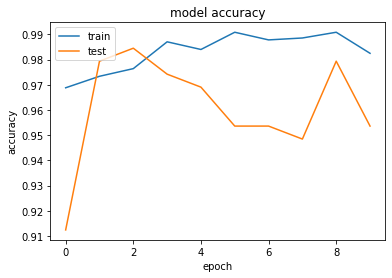

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

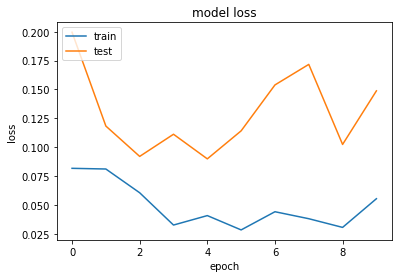

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Modeling

In [ ]:



# IMPLEMENTING LIVE DETECTION OF FACE MASK

mymodel=load_model('/content/drive/MyDrive/mymodel.h5')

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)

    cv2.imshow('img',img)

    if cv2.waitKey(1)==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
y_pred = np.argmax(Y_pred)
y_test = np.argmax(test_image1)
y_pred_labels=np.argmax(y_pred, axis=-1)
y_test_labels=np.argmax(y_test, axis=-1)
y_train_labels = y_pred_labels.reshape(-1,1)
y_pred_labels  = y_test_labels.reshape(-1,1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_pred = model.predict('/content/drive/MyDrive/test/with_mask/106-with-mask.jpg')
cm = confusion_matrix(np.argmax(y_pred_labels),y_train_labels)
print(cm)

TypeError: ignored

In [ ]:
print(np.argmax(y_test))

0


Epoch 1/8
80/80 [==============================] - 440s 5s/step - loss: 0.5076 - accuracy: 0.8233 - val_loss: 0.0777 - val_accuracy: 0.9700
Epoch 2/8
80/80 [==============================] - 426s 5s/step - loss: 0.1233 - accuracy: 0.9544 - val_loss: 0.1772 - val_accuracy: 0.9287
Epoch 3/8
80/80 [==============================] - 432s 5s/step - loss: 0.0947 - accuracy: 0.9660 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 4/8
80/80 [==============================] - 409s 5s/step - loss: 0.0874 - accuracy: 0.9669 - val_loss: 0.0678 - val_accuracy: 0.9712
Epoch 5/8
80/80 [==============================] - 429s 5s/step - loss: 0.0782 - accuracy: 0.9714 - val_loss: 0.0629 - val_accuracy: 0.9737
Epoch 6/8
80/80 [==============================] - 434s 5s/step - loss: 0.0654 - accuracy: 0.9745 - val_loss: 0.1013 - val_accuracy: 0.9600
Epoch 7/8
80/80 [==============================] - 411s 5s/step - loss: 0.0793 - accuracy: 0.9729 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 8/8
80/80 [===

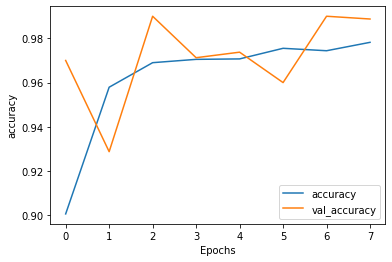

[[1.]]


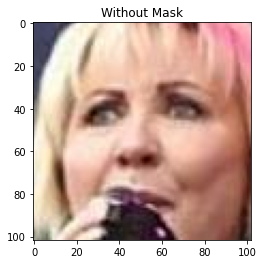